In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
test = pd.read_csv(r"c:\Users\Laura\Downloads\titanic\test.csv", sep=",")
train = pd.read_csv(r"c:\Users\Laura\Downloads\titanic\train.csv", sep=",")
gender = pd.read_csv(r"c:\Users\Laura\Downloads\titanic\gender_submission.csv", sep=",")

In [4]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
gender.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [10]:
test.tail(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [11]:
train.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
gender.tail(2)

,PassengerId,Survived
416,1308,0
417,1309,0


In [13]:
# contando quantidade de instâncias
classificacao = test.columns[-1]
np.unique(test[classificacao].astype(str), return_counts=True)

(array(['C', 'Q', 'S'], dtype=object), array([102,  46, 270]))

<Axes: xlabel='Embarked', ylabel='count'>

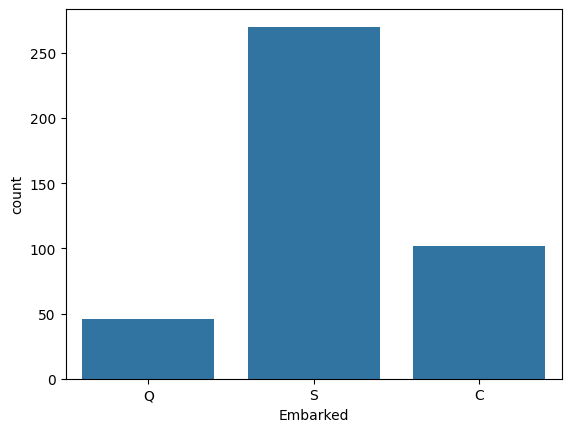

In [21]:
sns.countplot(x=test["Embarked"])


In [ ]:
classificacao = train.columns[-1]
np.unique(train[classificacao].astype(str), return_counts=True)

(array(['C', 'Q', 'S', 'nan'], dtype=object), array([168,  77, 644,   2]))

<Axes: xlabel='Embarked', ylabel='count'>

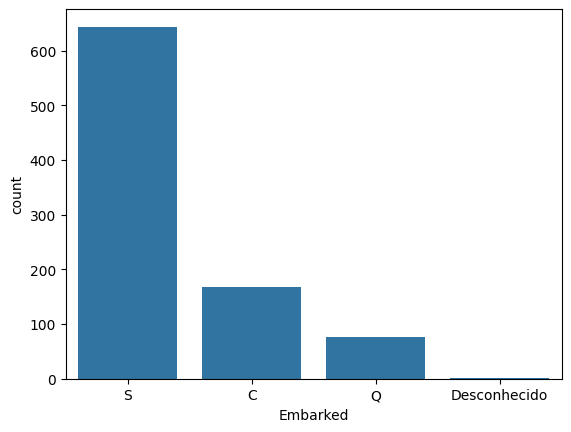

In [28]:
sns.countplot(x=train["Embarked"].fillna('Desconhecido'))

In [32]:
classificacao = gender.columns[-1]
np.unique(gender[classificacao].astype(str), return_counts=True)

(array(['0', '1'], dtype=object), array([266, 152]))

<Axes: xlabel='Survived', ylabel='count'>

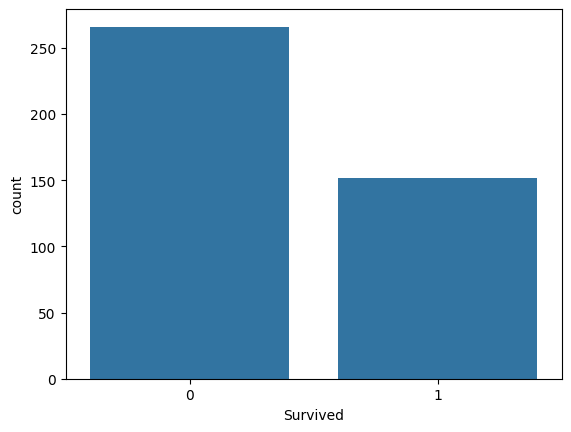

In [34]:
sns.countplot(x=gender["Survived"])

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
for col in test.columns:
    print(col)

PassengerId
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [38]:
cols_label_encode = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
test[cols_label_encode] = test[cols_label_encode].apply(lambda col: LabelEncoder(). fit_transform(col))

In [39]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,206,1,44,0,0,152,24,76,1
1,1,2,403,0,60,1,0,221,5,76,2
2,2,1,269,1,74,0,0,73,41,76,1
3,3,2,408,1,34,0,0,147,34,76,2
4,4,2,178,0,27,1,1,138,46,76,2
...,...,...,...,...,...,...,...,...,...,...,...
413,413,2,353,1,79,0,0,267,31,76,2
414,414,0,283,0,51,0,0,324,154,22,0
415,415,2,332,1,50,0,0,346,9,76,2
416,416,2,384,1,79,0,0,220,31,76,2


In [40]:
for col in train.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [ ]:
cols_label_encode = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
test[cols_label_encode] = test[cols_label_encode].apply(lambda col: LabelEncoder(). fit_transform(col))